# CIFAR100_VGG



### Modules Utilized in this Script

In [5]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from keras import regularizers
from keras.datasets import cifar100
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


### Class

In [6]:
class cifar100vgg:
# Initial Function
    def __init__(self, train = True):
        self.num_classes = 100
        self.weight_decay = 0.0005
        self.x_shape = [32, 32, 3]
        self.model = self.build_model()
        if train:
            self.model = self.train(self.model)
        else:
            self.model.load('cifar100vgg.h5')
            
        
# Model Architecture       
    def build_model(self):
        model = Sequential()
        weight_decay = self.weight_decay
        
        ## Block 1
        model.add(Conv2D(filters = 64, kernel_size = (3, 3), 
                         padding = 'same', input_shape = self.x_shape, 
                         activation = 'relu', name = 'Conv2D_1-1',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Conv2D(filters = 64, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_1-2',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size = (2, 2)))

        
        ## Block 2
        model.add(Conv2D(filters = 128, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_2-1',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        
        model.add(Conv2D(filters = 128, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_2-2',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size = (2, 2)))

        
        ## Block 3
        model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_3-1',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_3-2',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_3-3',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size = (2, 2)))

        
        ## Block 4
        model.add(Conv2D(filters = 512, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_4-1',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(filters = 512, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_4-2',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(filters = 512, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_4-3',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size = (2, 2)))


        ## Block 5
        model.add(Conv2D(filters = 512, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_5-1',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(filters = 512, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_5-2',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(filters = 512, kernel_size = (3, 3), 
                         padding = 'same', activation = 'relu', name = 'Conv2D_5-3',
                         kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.5))

        
        ## Flatten & Dense
        model.add(Flatten(name = 'Flatten'))
        model.add(Dense(units = 512, activation = 'relu', name = 'fs',
                        kernel_regularizer = regularizers.l2(weight_decay)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(units = self.num_classes, activation = 'softmax',
                        name = 'logit'))
        
        model.summary()
        return model
    
    

# Data Normalization for Training
    def normalize(self, X_train, X_test):
        ## This function normalize inputs for zero mean and unit variance.
        ## Input: training set and test set.
        ## Output: normalized training set and test set according to the trianing set statistics.
        mean = np.mean(X_train, axis = (0, 1, 2, 3))
        std = np.std(X_train, axis = (0, 1, 2, 3))
        X_train = (X_train - mean) / (std + 1e-7)
        X_test = (X_test - mean) / (std + 1e-7)
        return X_train, X_test
    
    

# Data Normalization for Prediction
    def normalize_production(self, x):
        ## This function is used to normalize instances in production according to saved training set statistics.
        ## Input: X - a training set.
        ## Output X - a normalized training set according to normalization constants.
        ## These values produced during first training and are general for the standard cifar100 training set normalization.
        mean = 121.936
        std = 68.389
        return (x - mean) / (std + 1e-7)
    
    
    
# Prediction
    def predict(self, x, normalize = True, batch_size = 50):
        if normalize:
            x = self.normalize_production(x)
        return self.model.predict(x, batch_size)
    
    
    
# Train Model
    def train(self, model):
        ## Training Parameters
        batch_size = 128
        maxepochs = 50
        learning_rate = 0.1
        lr_decay = 1e-6
        lr_drop = 20
        ## The data, shuffled and split between train and test sets:
        (x_train, y_train), (x_test, y_test) = cifar100.load_data()
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train, x_test = self.normalize(x_train, x_test)

        y_train = keras.utils.to_categorical(y_train, self.num_classes)
        y_test = keras.utils.to_categorical(y_test, self.num_classes)

        def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
        reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

        ## Data Augmentation
        datagen = ImageDataGenerator(
            featurewise_center = False,  ### set input mean to 0 over the dataset
            samplewise_center = False,  ### set each sample mean to 0
            featurewise_std_normalization = False,  ### divide inputs by std of the dataset
            samplewise_std_normalization = False,  ### divide each input by its std
            zca_whitening = False,  ### apply ZCA whitening
            rotation_range = 15,  ### randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range = 0.1,  ### randomly shift images horizontally (fraction of total width)
            height_shift_range = 0.1,  ### randomly shift images vertically (fraction of total height)
            zoom_range = 0.1,
            shear_range = 0.1,
            horizontal_flip = True,  ### randomly flip images
            vertical_flip = False)  ### randomly flip images
        ## (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)

        ## Optimization Details
        sgd = optimizers.SGD(lr = learning_rate, decay = lr_decay, momentum = 0.9, nesterov = True)
        model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

        ## Training process in a for loop with learning rate drop every 20 epochs.
        historytemp = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                                          steps_per_epoch = x_train.shape[0] // batch_size,
                                          epochs = maxepochs, verbose = 1, shuffle = True,
                                          validation_data = (x_test, y_test), 
                                          callbacks = [reduce_lr, ModelCheckpoint('cifar100vgg.h5',
                                                                                  monitor = 'val_accuracy',
                                                                                  save_best_only = True)])
        return model
    

### Main Function

In [7]:
if __name__ == '__main__':
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    y_train = keras.utils.to_categorical(y_train, 100)
    y_test = keras.utils.to_categorical(y_test, 100)

    model_current = cifar100vgg()
    model_best = load_model('cifar100vgg.h5')

    predicted_x = model_best.predict(x_test)
    residuals = np.argmax(predicted_x, 1) != np.argmax(y_test, 1)

    loss = sum(residuals) / len(residuals)
    print("the validation 0/1 loss is: ", loss)
    
# first time performance
# 44.63%
# trained for about 9.7 hours

# second time performance (maxepochs: 25 -> 50, zoom_range and shear_range added)
# 55.71%
# trained for about 20 hours

# parameters: 15,047,588

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1-1 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
Conv2D_1-2 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/50
390/390 [==============================] - 1480s 4s/step - loss: 19.5891 - accuracy: 0.0281 - val_loss: 15.4745 - val_accuracy: 0.0104 - lr: 0.1000
Epoch 2/50
390/390 [==============================] - 1527s 4s/step - loss: 11.2782 - accuracy: 0.0451 - val_loss: 9.6257 - val_accuracy: 0.0138 - lr: 0.1000
Epoch 3/50
390/390 [==============================] - 1506s 4s/step - loss: 7.3589 - accuracy: 0.0627 - val_loss: 6.8694 - val_accuracy: 0.0297 - lr: 0.1000
Epoch 4/50
390/390 [==============================] - 1488s 4s/step - loss: 5.5833 - accuracy: 0.0702 - val_loss: 5.4340 - val_accuracy: 0.0471 - lr: 0.1000
Epoch 5/50
390/390 [==============================] - 1443s 4s/step - loss: 4.7472 - accuracy: 0.0841 - val_loss: 4.6801 - val_accuracy: 0.0729 - lr: 0.1000
Epoch 6/50
390/390 [==============================] - 1423s 4s/step - loss: 4.3488 - accuracy: 0.1009 - val_loss: 4.3005 - val_accuracy: 0.1127 - lr: 0.1000
Epoch 7/50
390/390 [==============================] - 1

### Predict Selected Image

n = 9
Inference label: apple
Ground truth label: apple


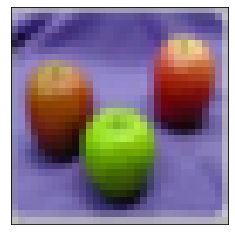

In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras.models import load_model
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Plot testing data
def plot(a):
    a = a.astype(np.uint8)
    return a.reshape(32, 32, 3)

# ********** Display testing images **********
print("n = ", end = '')
n = int(input())
ax = plt.subplot()
plt.imshow(plot(x_test[n]), cmap = None)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

y_test = keras.utils.to_categorical(y_test, 100)
model_test = load_model('cifar100vgg.h5') 
x_test = x_test.astype('float32')
mean = 120.707
std = 64.15
x_test[n] = (x_test[n] - mean) / (std + 1e-7)
category = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]
### Print inference results corresponding to the image we plot
prediction = model_test.predict(x_test[n].reshape(-1, 32, 32, 3))
print("Inference label: {}".format(category[np.argmax(prediction, axis = 1)[0]]))
print("Ground truth label: {}".format(category[np.argmax(y_test[n], axis = 0)])) 
